# Molecular Dynamics in Python- Optimization (Fall, 2020)
Prof. Bin Shan(bshan@mail.hust.edu.cn), Huazhong University of Science and Technology

Nano Materials Design and Manufacturing research center at HUST (www.materialssimulation.com)

Molecular simulations have been heralded as the new computational microscope that are helping us understand how molecules interact with each other and how they self assemble into complex structures. A molecular dynamics simulation is a particular type of simulation which generally approximates the intermolecular forces/energy using mathematical functions. The impact of temperature is often included (which usually drives molecules apart) and the interplay between this thermal energy and the intermolecular energy gives rise to the self assembly processes.

### Optimization

The steepest descent method is the simplest of the gradient methods for optimization in `n` variables. It can be justified by the following geometrical argument. If we want to minimize a function $f(x)$ and if our current trial point is $x_k$ then we can expect to find better points by moving away from $x_k$ along the direction which causes F to decrease most rapidly. This direction of steepest descent is given by the negative gradient. To use a geographical illustration: suppose we are walking on a hillside in thick fog and wish to get to the bottom of the valley. Even though we cannot see ahead, we can still reach our objective if we make sure each step is taken down the local line of greatest slope.

### Excercise 1 (Steepest Gradient Algorithm in Quadratic)

In this excercise, we apply the steepest descent algorithm to a function of the quadratic form.

$$f(x)=\frac{1}{2}x^TAx-b^Tx+c$$

we can set $c=0$ as it doesn't influence the results of the optimization. A and b are given by

$$A=\begin{bmatrix}
3 & 2  \\
2 & 6  \\
\end{bmatrix}$$

$$b=\begin{bmatrix}
2   \\
-8   \\
\end{bmatrix}$$

#### Instructions

- Define a function `quadratic_1d` that takes an 1D input vector `x` and returns the function value of a single point

- Define the gradient function `grad_q` that takes an 1D input vector `x` and returns the gradient of a single point

- Define a function `quadratic` that takes an 2D input vector `X` and returns the function values of several points

#### Questions

- What is the function value `y` if x=[3.1415926 -3.1415926] (accuracy at least to 3rd decimal)  
- What is the gradient at x=[3.1415926 -3.1415926] (accuracy at least to 3rd decimal)  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[3,2],[2,6]])
b = np.array([2,-8])

# x represents a single point
def quadratic_1d(x):
    result = 0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x)
    return result

def grad_q(x):
    grad = np.dot(A, x) - b
    return grad

# X is an array of points
def quadratic(X):
    results = np.array([])
    for row in X:
         results = np.append(results,quadratic_1d(row))
    return results

#Enter your code here


#### Instructions

- Define a XY mesh that spans the range x=[-4,6] and y =[-6,4]
- Plot the countour using matplotlib.pyplot

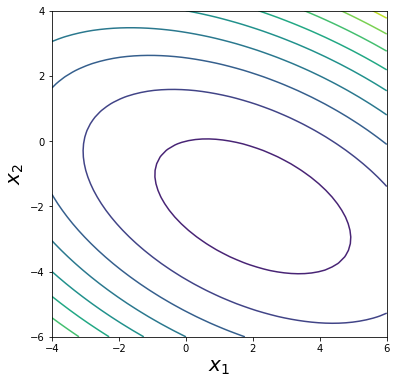

In [2]:
#Creating the mesh
XX, YY = np.mgrid[-4:6:50j, -6:4:50j]
X = np.c_[XX.ravel(), YY.ravel()]
Z = quadratic(X).reshape(XX.shape)

#Creating the contour
num_of_contours = 10
plt.figure(figsize=[6,6])
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20)
plt.contour(XX, YY, Z, num_of_contours)

#### Instructions

Now we perform a single step update to the point using the steepest descent algorithm. The rule for the update of steepest descent is 

$$x^{k+1} = x^k +\alpha_k p^k$$

where 

$$p^k = b-Ax^k$$
$$\alpha_k = \frac{(p^k,p^k)}{(Ap^k,p^k)}$$

- Define a function `quad_step` to find the stepsize of a single step

#### Questions

- What is the direction of steepest descent of the function at starting point of [-4.0, -4.0]?  
- What is the optimal step size along the $p^1$ direction from the starting point? 

In [3]:
def quad_stepsize(A, p):
    '''Determine the stepsize of quadratic function'''
    alpha = np.dot(p, p)/np.dot(np.dot(A, p), p)
    return alpha
    
#Enter your code here
x0 = np.array([-4.0, -4.0])
p =  
alpha =  
print(p, alpha)

#### Instructions
For some other functions, such as Rosenbrock function, the determination of the step size along each descent direction is more eleborate. In some cases, approximate 1D  search algorithm is employed. These algorithms are usually fast compared to exact line search. For example, the Backtracking-Armijo line search method is described as follows:

$$f(x_k+\alpha_kp_k)\leq f(x_k)+\alpha_k\beta g_k^tp_k$$

#### Questions
- What is the optimal step size from x=[-4.0 -4.0] if we use the Backtracking-Armijo line search method? 

In [4]:
def backtracking(f, df, x, p):
    '''Backtracking-Armijo line search method'''
    tau = 0.5
    beta = 0.4
    # Ensure a proper maximum stepsize
    # fmax - maximum force veror, dmax - maximum moving distance
    fmax = abs(np.max(p))
    dmax = 1
    alpha = min(1, dmax / fmax)
    
    f_x = f(x)
    dphi = np.dot(df(x),p)
    
    j = 0 #Searching step
    #Loop until Armijo condition is satisfied
    while f(x + alpha * p) > f_x + alpha * beta * dphi:
        alpha *= tau
        j += 1
    return alpha

#Enter your code here
alpha =  
print(alpha)

#### Instructions
In some other cases, exact 1d search method will be used. cubic interpolation method starts from the current point and another point but with ascending derivative, which ensures a local minimum within the range defined by the two points.  

The cubic interpolation algorithm for exact 1d line search is described as follows:  

1. Given initial points $\alpha_1$ $\alpha_2$ and the error threshold $\delta$, satisfying $\alpha_1<\alpha_2$, calculate the function values $\varphi_1$, $\varphi_2$ and the derivatives $\varphi'_1$ $\varphi'_2$, satisfying $\varphi'_1<0$ $\varphi'_2>0$  

2. Calculate the best estimate $\alpha$
$$ \begin{cases}
z  =  \dfrac{3(\varphi_2-\varphi_1)}{\alpha_2-\alpha_1} - \varphi'_1 - \varphi'_2 \\
\omega^2  = z^2 - \varphi'_1\varphi'_2 \\
\end{cases}
$$
$$\alpha = \alpha_1 + (\alpha_2 - \alpha_1)\dfrac{\omega-z-\varphi'_1}{2\omega-\varphi'_1+\varphi'_2}$$
where:
$$\varphi(\alpha) = f(x_k+\alpha p_k)$$  

3. Until $\alpha_2-\alpha_1<\delta$  
if $\varphi'(\alpha)=0$,stop loop,set $\alpha_k=\alpha$  
if $\varphi'(\alpha)<0$,set $\alpha_1=\alpha$,$\varphi_1=\varphi(\alpha)$,$\varphi'_1=\varphi'(\alpha)$,jump to 2.  
if $\varphi'(\alpha)>0$,set $\alpha_2=\alpha$,$\varphi_2=\varphi(\alpha)$,$\varphi'_1=\varphi'(\alpha)$,jump to 2.  

#### Questions
- What is the optimal step size from x=[-4.0 -4.0] if we use the cubic interpolation method?

In [ ]:
def phi(f, alpha, x, p):
        return f(x+alpha*p)
    
def dphi(df, alpha, x, p):
        return np.dot(df(x + alpha * p), p)

def init(df,x,p):
    '''initialize the start&end point'''
    start = end = 1e-30
    while dphi(df,end,x,p) < 0:
        end *= 10
    while dphi(df, start, x, p) > 0:
        start *= 0.1
    return start, end
    
def cubInterpo2(f, df, x, p, start, end):
    '''Cubic Interpolation Method with Two-Points for exact line search'''
    j = 0
    while True:
        intervalLen = end - start
        fStart, fEnd = phi(f,start,x,p), phi(f,end,x,p)
        dfStart, dfEnd = dphi(df,start,x,p), dphi(df,end,x,p)
        dfSE = dfStart * dfEnd
        z = 3 * (fEnd - fStart) / intervalLen - dfStart - dfEnd
        omega = np.sqrt(z ** 2 - dfSE)
        alpha = start + (omega - dfStart - z) * intervalLen / (2 * omega - dfStart + dfEnd)
        df0 = dphi(df,alpha,x,p)
        if abs(df0) < 1e-4:
            break
        elif df0 > 0:
            end = alpha
        else:
            start = alpha
        j += 1
        
    return alpha

#Enter your code here 
start, end = init(grad_q, x0, p)
alpha =  
print(p, alpha)

#### Instructions

- Define a function `SD_single_step` to find the next point in a single seach step
- The parameter `mode` accepts a certain stepsize searching method, such as `cubInterpo2`, `backtracking` or `quad_stepsize`
- Start from [-4.0 -4.0], find the next point if we use `quad_stepsize` method

#### Questions

- What is the next point if we use `backtracking` method?
- What is the next point if we use `cubInterpo2` method?

In [ ]:
def SD_single_step(f, df, x0, mode):
    p = -df(x0)
    if mode == quad_stepsize:
        alpha = quad_stepsize(A, p)     
    elif mode == backtracking:
        alpha = backtracking(f, df, x0, p)        
    elif mode == cubInterpo2:
        start, end = init(df, x0, p)
        alpha = cubInterpo2(f, df, x0, p, start, end)
    x1 = x0 + alpha * p
    delta = np.linalg.norm(p)
    return x1, delta

#Find the next point
x0 = np.array([-4.0, -4.0])
x1, delta = SD_single_step(quadratic_1d, grad_q, x0, quad_stepsize)
print("next point: ",x1)

#Plot the figure 
plt.figure(figsize=[6,6])
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20)
plt.contour(XX, YY, Z, num_of_contours)
X = np.c_[x0,x1]
plt.plot(X[0],X[1],'r--o')

# backtracking method
x1, delta = SD_single_step(quadratic_1d, grad_q, x0, backtracking)
print("next point: ",x1)

# cubInterpo2 method
#Enter your code here


#### Instructions

Now we will complete the steepest descent method to find the extreme point of the quadratic function.

#### Questions

- What is the function value after the 7th step? 
- What is the direction of steepest descent at 7th step? 

In [ ]:
def SD_search(f, df, x0, mode):
    '''Steepest descent algorithm to find the extreme point of a given function'''
    x = x0
    k = 0
    kmax = 20000
    delta = 1.0
    W = np.zeros((len(x), kmax))
    W[:, 0] = x
    
    print("Initial point: ",x0)
    
    while k < kmax and delta > 1e-5:
        x, delta = SD_single_step(f, df, x, mode)
        k += 1
        W[:, k] = x 
    
    print("Final point: ",W[:, k])
    print("Toatl steps: ",k)
    
    return W[:, 0:k]

#Start from [-4.0, -4.0]
x0 = np.array([-4.0, -4.0])
W = SD_search(quadratic_1d, grad_q, x0, quad_stepsize)

# Plot the figure
plt.figure(figsize=(6,6))
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20)
plt.contour(XX, YY, Z, 40)
plt.plot(W[0,:],W[1,:],marker='o', markerfacecolor='none', linewidth=1)
plt.show()

# Plot the points from the 4th step 
XX1, YY1 = np.mgrid[1.9:2.05:50j, -2.05:-1.9:50j]
X1 = np.c_[XX1.ravel(), YY1.ravel()]
Z1 = quadratic(X1).reshape(XX1.shape)

num_of_contours = 10
plt.figure(figsize=[6,6])
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20)
plt.contour(XX1, YY1, Z1, num_of_contours)
plt.plot(W[0,4:],W[1,4:],marker='o', markerfacecolor='none', linewidth=1)
plt.show()

x6 = [W[0,6],W[1,6]]
x7 = [W[0,7],W[1,7]]
#Enter your code here
p7 = 
print("p7:",p7)
print("f(x7):",quadratic_1d(x7))